In [1]:
import numpy as np
from scipy import stats

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import pandas as pd

In [5]:
import folium

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
df = pd.read_csv('hotel_bookings.csv')

In [123]:
df.shape

(119390, 32)

In [9]:
df.head(50)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [11]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [12]:
for i in df.columns:
    print(i,':',df[i].value_counts().nunique())

hotel : 2
is_canceled : 2
lead_time : 294
arrival_date_year : 3
arrival_date_month : 12
arrival_date_week_number : 53
arrival_date_day_of_month : 31
stays_in_weekend_nights : 15
stays_in_week_nights : 27
adults : 8
children : 5
babies : 4
meal : 5
country : 85
market_segment : 8
distribution_channel : 5
is_repeated_guest : 2
previous_cancellations : 14
previous_bookings_not_canceled : 29
reserved_room_type : 10
assigned_room_type : 12
booking_changes : 15
deposit_type : 3
agent : 147
company : 61
days_in_waiting_list : 56
customer_type : 4
adr : 261
required_car_parking_spaces : 5
total_of_special_requests : 6
reservation_status : 3
reservation_status_date : 248


In [13]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [14]:
for i in ['hotel', 'is_canceled','meal','market_segment', 'distribution_channel','previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type','customer_type','required_car_parking_spaces','reservation_status']:
    print(i,df[i].value_counts(),sep='\n')

hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
is_canceled
0    75166
1    44224
Name: is_canceled, dtype: int64
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64
distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64
previous_cancellations
0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64
previous_bookings_not_canceled
0     115770
1       1542
2        580
3        33

In [15]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [16]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df1 = df.fillna({'children':0,'country':'others','agent':0,'company':0})

In [8]:
df1['meal'].replace('Undefined','SC',inplace=True)

In [126]:
df1[df1['market_segment']=='Undefined'].index

Int64Index([40600, 40679], dtype='int64')

In [9]:
df1.drop(df1['market_segment'][df1['market_segment']=='Undefined'].index,axis='rows',inplace=True)

In [10]:
df1.drop(df1['distribution_channel'][df1['distribution_channel']=='Undefined'].index,axis='rows',inplace=True)

In [11]:
countries = df.loc[df['is_canceled']==0]['country'].value_counts().to_frame().rename(columns={'country':'No. of visitors'})

In [12]:
countries['%'] = (countries['No. of visitors']/countries['No. of visitors'].sum()) * 100

In [13]:
countries.head(10)

,No. of visitors,%
PRT,21071,28.190514
GBR,9676,12.945348
FRA,8481,11.346578
ESP,6391,8.550405
DEU,6069,8.119607
IRL,2543,3.402234
ITA,2433,3.255067
BEL,1868,2.499164
NLD,1717,2.297144
USA,1596,2.135260


In [14]:
countries['country'] = countries.index

In [15]:
countries['country'][countries['%']<=0.5] = 'Others'

C:\Users\Awadhesh Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
countries['%'][countries['country']=='Others'].sum()

5.90139808682855

In [17]:
countries = countries.groupby('country')['%'].agg(lambda x: x).to_frame()

In [18]:
countries.loc['Others'] = 5.90139808682855

In [19]:
countries = countries.sort_values('%',ascending=False)

In [20]:
countries

,%
country,
PRT,28.1905
GBR,12.9453
FRA,11.3466
ESP,8.5504
DEU,8.11961
Others,5.9014
IRL,3.40223
ITA,3.25507
BEL,2.49916


([<matplotlib.patches.Wedge at 0x1e2b9ddd7c8>,
 [Text(0.7593612075442447, 0.9291773546944344, 'PRT'),
  Text(-0.6275872965605711, 0.9034014529520051, 'GBR'),
  Text(-1.0779666342879373, 0.21906148762832864, 'FRA'),
  Text(-1.0023262541868674, -0.4531468637955289, 'ESP'),
  Text(-0.6413726985758713, -0.8936671984142109, 'DEU'),
  Text(-0.19911256956679105, -1.0818290921585119, 'Others'),
  Text(0.12104854375856788, -1.0933193723948782, 'IRL'),
  Text(0.34540996174820937, -1.0443619862505054, 'ITA'),
  Text(0.5275488215601088, -0.9652420633553744, 'BEL'),
  Text(0.6664645995115626, -0.8751142425980123, 'NLD'),
  Text(0.7814781816471921, -0.774139426466188, 'USA'),
  Text(0.872347015249831, -0.6700825956437841, 'BRA'),
  Text(0.942520454240593, -0.5671465360364166, 'CHE'),
  Text(0.9935565362186813, -0.47206504778169767, 'AUT'),
  Text(1.0306243254890706, -0.3844652126138315, 'CN'),
  Text(1.057017370722688, -0.30449019358674917, 'SWE'),
  Text(1.0741115464746283, -0.23724330492109305, 'P

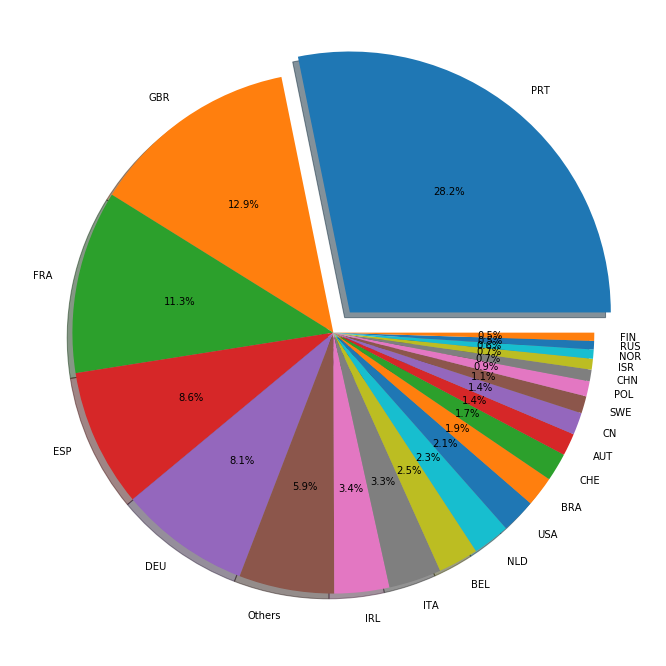

In [22]:
plt.figure(figsize=(15,12))
ax=plt.axes()
ax.pie(x=countries['%'],labels=countries.index,autopct='%1.1f%%',shadow=True,explode=[0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

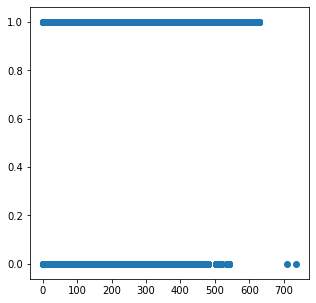

In [33]:
plt.figure(figsize=(5,5))
ax=plt.axes()
ax.scatter(x=df1['lead_time'],y=df1['is_canceled'])

In [34]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [35]:
by_year = df1.groupby('arrival_date_year')['is_canceled'].sum().to_frame()

[Text(0, 0.5, 'Total Cancellations'), Text(0.5, 0, 'Year')]

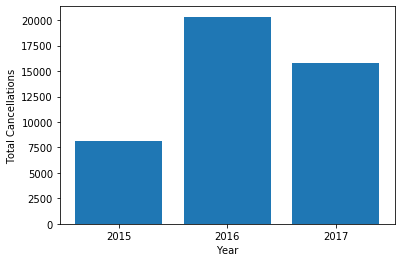

In [36]:
ax=plt.axes()
ax.bar(x=list(map(str, by_year.index)),height=by_year['is_canceled'])
ax.set(xlabel='Year',ylabel="Total Cancellations")

In [37]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [38]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [39]:
by_month = df1.groupby('arrival_date_month')['is_canceled'].sum().to_frame()

In [40]:
by_month

,is_canceled
arrival_date_month,
April,4524
August,5235
December,2371
February,2696
January,1807
July,4742
June,4535
March,3149
May,4677


In [41]:
by_month = by_month.reindex(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

[Text(0, 0.5, 'Total Cancels'), Text(0.5, 0, 'Months')]

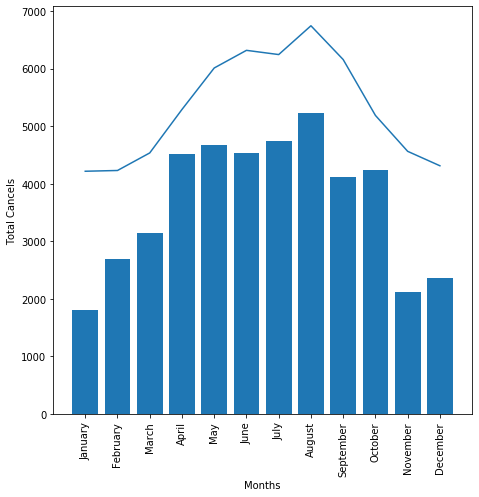

In [54]:
plt.figure(figsize=(7.5,7.5))
ax=plt.axes()
ax.bar(x=by_month.index,height=by_month['is_canceled'])
ax.plot(by_month.index,month_guests['adrpp'])
plt.xticks(rotation=90)
ax.set(xlabel='Months',ylabel='Total Cancels')

In [ ]:
df1.columns

In [129]:
df1.drop(df1[df1['adults']+df1['children']+df1['babies']==0].index,axis='rows',inplace=True)

In [130]:
df1.shape

(119205, 32)

In [131]:
df1['adrpp'] = df1['adr'] / (df1['adults']+df1['children'])

In [45]:
room_type_guests = df1[df1['is_canceled']==0][['hotel','adrpp','assigned_room_type']]

In [46]:
room_type_guests = room_type_guests.sort_values('assigned_room_type')

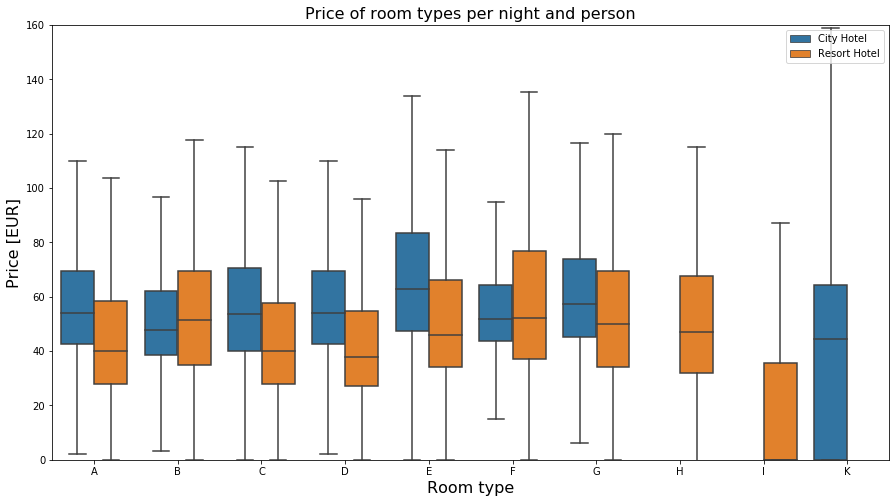

In [47]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="assigned_room_type",
            y="adrpp",
            hue="hotel",
            data=room_type_guests, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

In [ ]:
by_month

In [48]:
month_guests = df1[df1['is_canceled']==0][['hotel','adrpp','arrival_date_month']]

In [49]:
month_guests = month_guests.groupby('arrival_date_month')['adrpp'].mean().to_frame()

In [50]:
month_guests=month_guests.reindex(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

In [53]:
month_guests= month_guests['adrpp'].apply(lambda x: x*10).to_frame()

In [ ]:
month_guests['adrpp']

In [ ]:
df1.head()

In [132]:
df1[['arrival_date_year','is_repeated_guest']]=df1[['arrival_date_year','is_repeated_guest']].astype(str)

In [133]:
df1.shape

(119205, 33)

In [134]:
l=[]
for i in df1.columns:
    if df1[i].dtype=='O':
        l.append(i)

In [135]:
l

['hotel',
 'arrival_date_year',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [136]:
df1_cat = df1[l]

In [137]:
l=[]
for i in df1.columns:
    if i not in df1_cat.columns:
        l.append(i)

In [60]:
df1_num = df1[l]

In [138]:
len(df1_cat.columns.to_list())

14

In [139]:
len(df1_num.columns.to_list())

19

In [63]:
df1_num.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119205.0,0.370748,0.483007,0.00,0.0,0.00,1.0,1.0
lead_time,119205.0,104.112630,106.876085,0.00,18.0,69.00,161.0,737.0
arrival_date_week_number,119205.0,27.163198,13.601360,1.00,16.0,28.00,38.0,53.0
arrival_date_day_of_month,119205.0,15.799119,8.781005,1.00,8.0,16.00,23.0,31.0
stays_in_weekend_nights,119205.0,0.927050,0.995121,0.00,0.0,1.00,2.0,19.0
stays_in_week_nights,119205.0,2.499199,1.897116,0.00,1.0,2.00,3.0,50.0
adults,119205.0,1.859192,0.575188,0.00,2.0,2.00,2.0,55.0
children,119205.0,0.104039,0.398835,0.00,0.0,0.00,0.0,10.0
babies,119205.0,0.007961,0.097511,0.00,0.0,0.00,0.0,10.0
previous_cancellations,119205.0,0.087194,0.844936,0.00,0.0,0.00,0.0,26.0


In [64]:
df1_num.skew().to_frame()

,0
is_canceled,0.535207
lead_time,1.345775
arrival_date_week_number,-0.010161
arrival_date_day_of_month,-0.002176
stays_in_weekend_nights,1.320284
stays_in_week_nights,2.754926
adults,18.774934
children,4.109172
babies,24.627445
previous_cancellations,24.443414


In [65]:
from scipy import stats

In [66]:
import numpy as np

In [67]:
df1_num.skew().sort_values(ascending=True).to_frame()

,0
arrival_date_week_number,-0.010161
arrival_date_day_of_month,-0.002176
is_canceled,0.535207
agent,1.298483
stays_in_weekend_nights,1.320284
lead_time,1.345775
total_of_special_requests,1.349175
stays_in_week_nights,2.754926
children,4.109172
required_car_parking_spaces,4.162639


In [ ]:
df1_num['children'].apply(np.log1p).skew()

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
scaler = PowerTransformer(method = 'yeo-johnson')

In [ ]:
df1_num['babies'] = scaler.fit_transform(df1_num['babies'].to_frame())

In [ ]:
df1_num['babies'].skew()

In [68]:
from sklearn.preprocessing import RobustScaler

In [69]:
scaler = RobustScaler()

In [70]:
df1_num = scaler.fit_transform(df1_num)

In [72]:
df1_num=pd.DataFrame(df1_num,columns=['is_canceled','lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'adrpp'])

In [75]:
df1_num.columns

Index(['is_canceled', 'lead_time', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'adrpp'],
      dtype='object')

In [ ]:
df1_num.head()

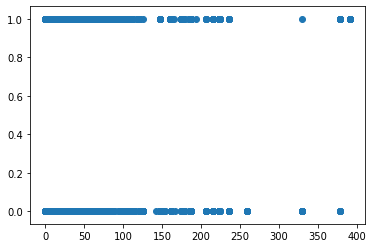

In [76]:
ax= plt.axes()
ax.scatter(x=df1_num['days_in_waiting_list'],y=df1_num['is_canceled'])

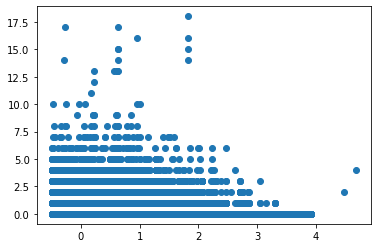

In [74]:
ax= plt.axes()
ax.scatter(x=df1_num['lead_time'],y=df1_num['booking_changes'])

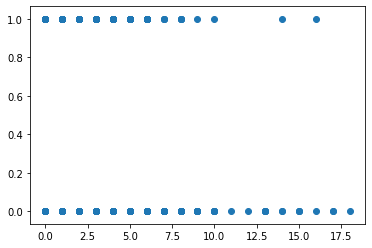

In [78]:
ax= plt.axes()
ax.scatter(x=df1_num['booking_changes'],y=df1_num['is_canceled'])

In [79]:
df1_num.corr()['is_canceled'].sort_values(ascending=False).to_frame()

,is_canceled
is_canceled,1.000000
lead_time,0.292930
previous_cancellations,0.110147
adults,0.058157
days_in_waiting_list,0.054308
adr,0.046559
stays_in_week_nights,0.025551
adrpp,0.017867
arrival_date_week_number,0.008299
children,0.004877


In [87]:
by_lt = df1_num.groupby('lead_time')['is_canceled'].mean().to_frame()

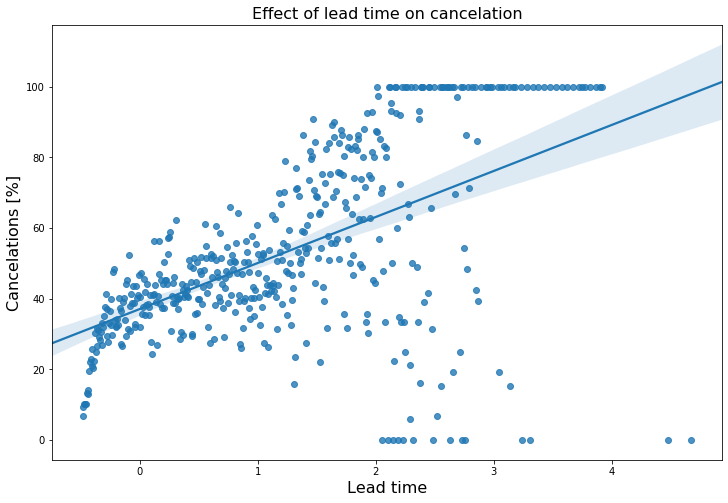

In [98]:
plt.figure(figsize=(12, 8))
sns.regplot(x=by_lt.index.to_numpy(), y=by_lt['is_canceled']*100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,365)
plt.show()

In [109]:
df1_cat = df1_cat.rename(columns={0:'is_canceled'})

In [115]:
df1_cat.drop('is_canceled',axis='columns',inplace=True)

In [142]:
df1_cat.shape

(119205, 14)

In [141]:
df1_num['is_canceled'].shape

(119205,)

In [120]:
df1_num.shape

(119205, 19)

In [121]:
df1_cat.shape

(238410, 14)

In [143]:
df1_cat=pd.concat([df1_num['is_canceled'],df1_cat],axis='columns')

In [144]:
by_dt = df1_cat.groupby('deposit_type')['is_canceled'].mean().to_frame()

In [145]:
by_dt

,is_canceled
deposit_type,
No Deposit,0.301723
Non Refund,0.867142
Refundable,0.283951


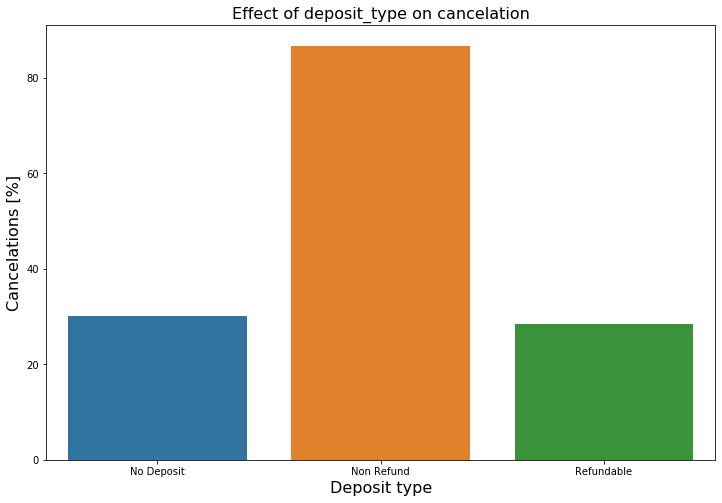

In [146]:
plt.figure(figsize=(12, 8))
sns.barplot(x=by_dt.index, y=by_dt['is_canceled'] * 100)
plt.title("Effect of deposit_type on cancelation", fontsize=16)
plt.xlabel("Deposit type", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()

In [148]:
by_adr = by_dt = df1_num.groupby('adr')['is_canceled'].mean().to_frame()

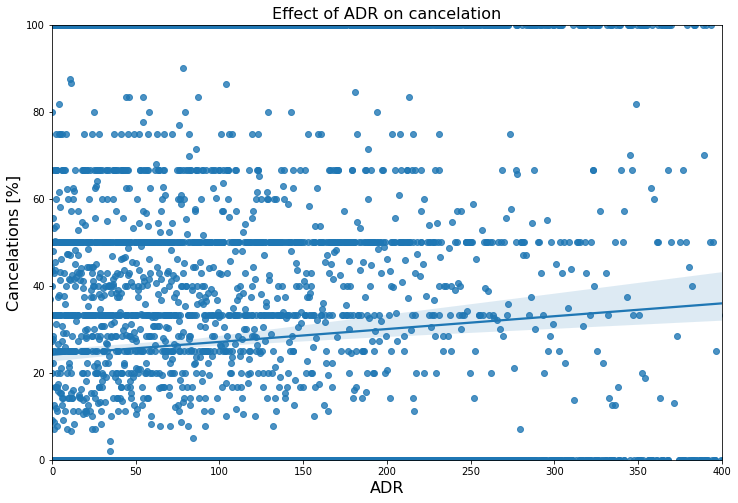

In [158]:
plt.figure(figsize=(12, 8))
sns.regplot(x=by_dt.index.to_numpy()*100, y=by_adr['is_canceled']*100)
plt.title("Effect of ADR on cancelation", fontsize=16)
plt.xlabel("ADR", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.xlim(0,400)
plt.ylim(0,100)
plt.show()

In [163]:
by_ms = df1_cat.groupby('market_segment')['is_canceled'].mean()

In [165]:
by_ms = by_ms.to_frame()

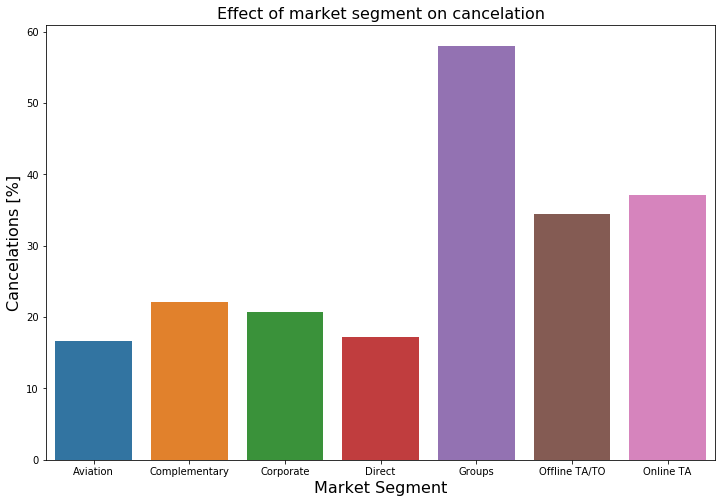

In [166]:
plt.figure(figsize=(12, 8))
sns.barplot(x=by_ms.index, y=by_ms['is_canceled'] * 100)
plt.title("Effect of market segment on cancelation", fontsize=16)
plt.xlabel("Market Segment", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()

In [168]:
from scipy import stats

In [203]:
stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(df1_cat['reserved_room_type'],df1_cat['arrival_date_month'],margins=False))

In [193]:
dof

6

In [194]:
critical = stats.chi2.ppf(0.95, dof)

In [195]:
critical

12.591587243743977

In [202]:
pd.crosstab(df1_cat['reserved_room_type'],df1_cat['arrival_date_month'])

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
reserved_room_type,,,,,,,,,,,,
A,7724,8912,4898,6083,4638,8186,7888,7092,8304,5446,8628,8073
B,90,169,136,85,80,153,55,93,52,45,90,63
C,58,267,34,44,16,213,112,40,60,19,25,43
D,2002,2655,983,1094,656,2385,1819,1624,2203,783,1554,1421
E,701,901,384,404,290,896,525,559,645,306,447,461
F,292,484,180,177,128,364,261,191,262,100,224,231
G,171,357,102,127,87,334,198,145,210,53,145,163
H,40,110,42,38,26,108,71,24,44,19,34,45
L,0,2,0,0,0,4,0,0,0,0,0,0


In [204]:
print(p)

0.0
